In [2]:
import pandas as pd

In [3]:
# File paths
names_path = r"names.csv"
regions_path = r"regions.csv"

# Load CSVs
df_names = pd.read_csv(names_path)
df_regions = pd.read_csv(regions_path)

In [4]:
# Preview data
print(df_names.head())
print(df_names.columns)

  State Gender  Year      Name  Births
0    AK      F  1980   Jessica     116
1    AK      F  1980  Jennifer     114
2    AK      F  1980     Sarah      82
3    AK      F  1980    Amanda      71
4    AK      F  1980   Melissa      65
Index(['State', 'Gender', 'Year', 'Name', 'Births'], dtype='object')


In [5]:
# Filter for Selena
df_selena = df_names[df_names['Name'].str.lower() == 'selena']

# Group by Year and State
df_selena_trend = df_selena.groupby(['Year', 'State'])['Births'].sum().reset_index()

# Pivot for bar chart race
df_pivot = df_selena_trend.pivot(index='Year', columns='State', values='Births').fillna(0)

# Get top 10 states by max Selena births
top_states = df_pivot.max().sort_values(ascending=False).head(10).index.tolist()
df_top_states = df_pivot[top_states]


In [6]:
# Signature colors
bg_color = '#000000'      # Black background
bar_color = '#800080'     # Purple bars
tx_color = '#FF0000'      # Red for Texas
text_color = '#FFD700'    # Gold for text


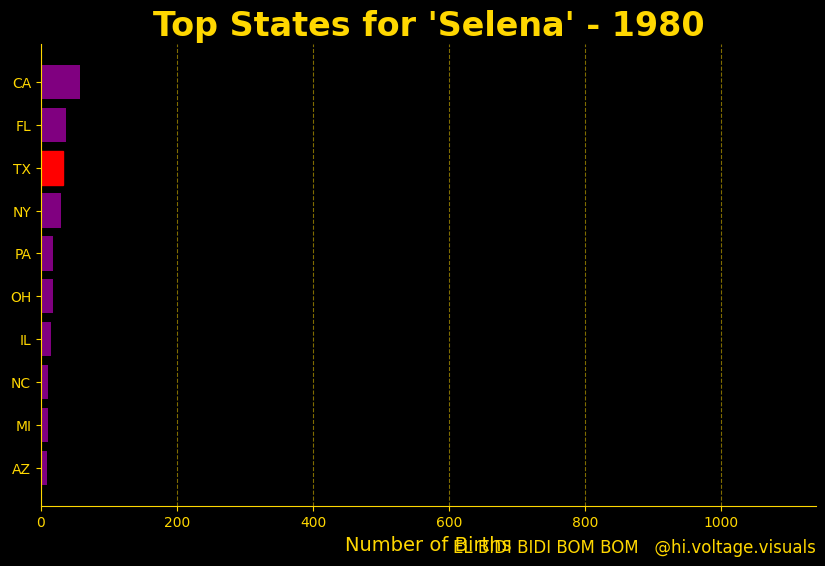

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

def draw_barchart(year):
    ax.clear()
    year_data = df_top_states.loc[year].sort_values(ascending=True)
    bars = ax.barh(year_data.index, year_data.values, color=bar_color)
    for bar, state in zip(bars, year_data.index):
        if state == 'TX':
            bar.set_color(tx_color)
    ax.set_title(f"Top States for 'Selena' - {year}", fontsize=24, weight='bold', color=text_color)
    ax.set_xlim(0, df_top_states.values.max() * 1.1)
    ax.set_xlabel('Number of Births', fontsize=14, color=text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(text_color)
    ax.spines['bottom'].set_color(text_color)
    ax.grid(axis='x', linestyle='--', alpha=0.5, color=text_color)
    ax.text(1.0, -0.1, "EL BIDI BIDI BOM BOM   @hi.voltage.visuals", transform=ax.transAxes,
            size=12, ha='right', color=text_color)

# Run animation
years = df_top_states.index.tolist()
anim = animation.FuncAnimation(fig, draw_barchart, frames=years, interval=500, repeat=False)

# Optional: Save as GIF
anim.save("selena_name_trend.gif", writer='pillow', dpi=150)


C:\Users\13615\AppData\Local\Temp\ipykernel_13140\2787645213.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


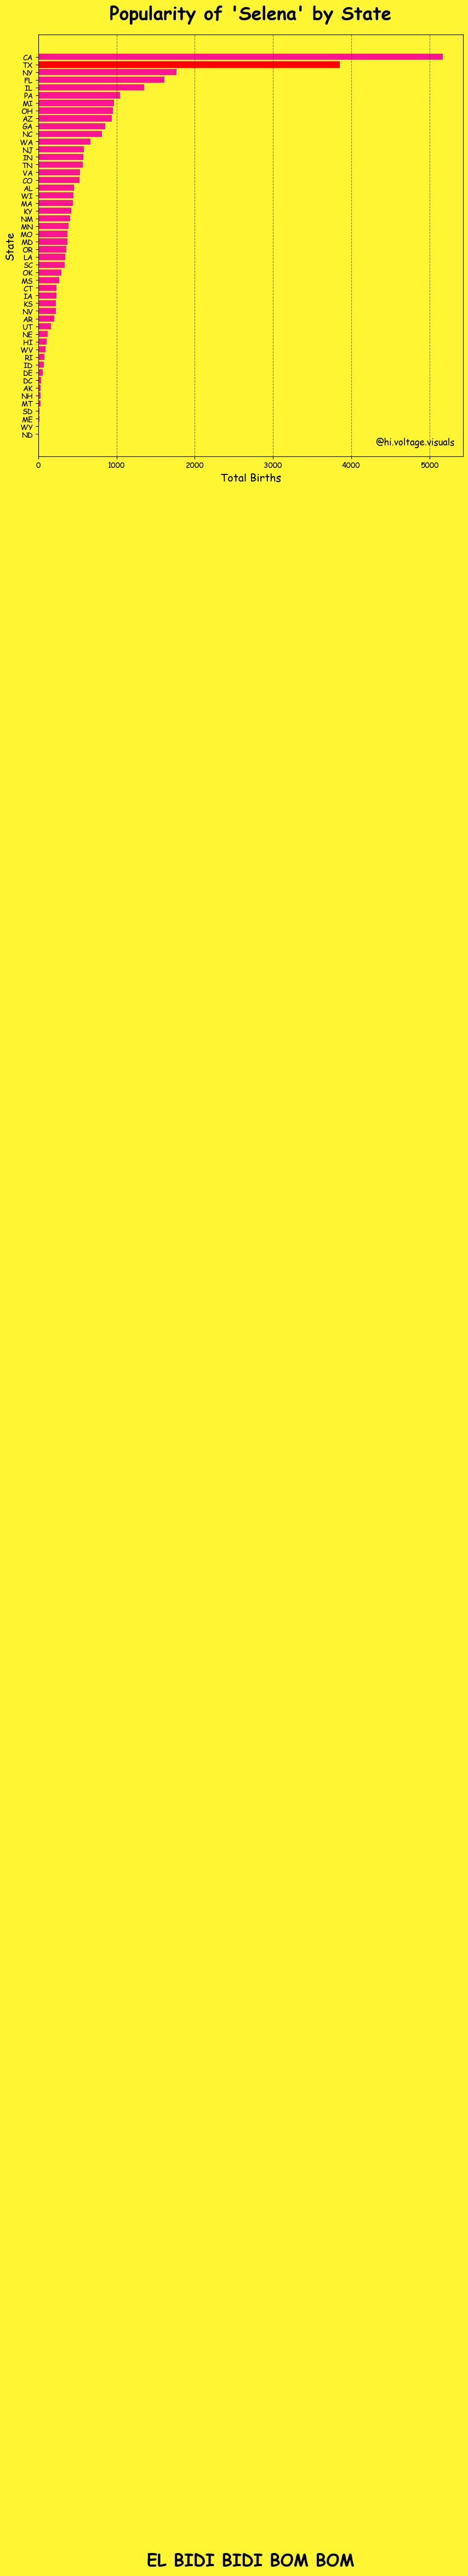

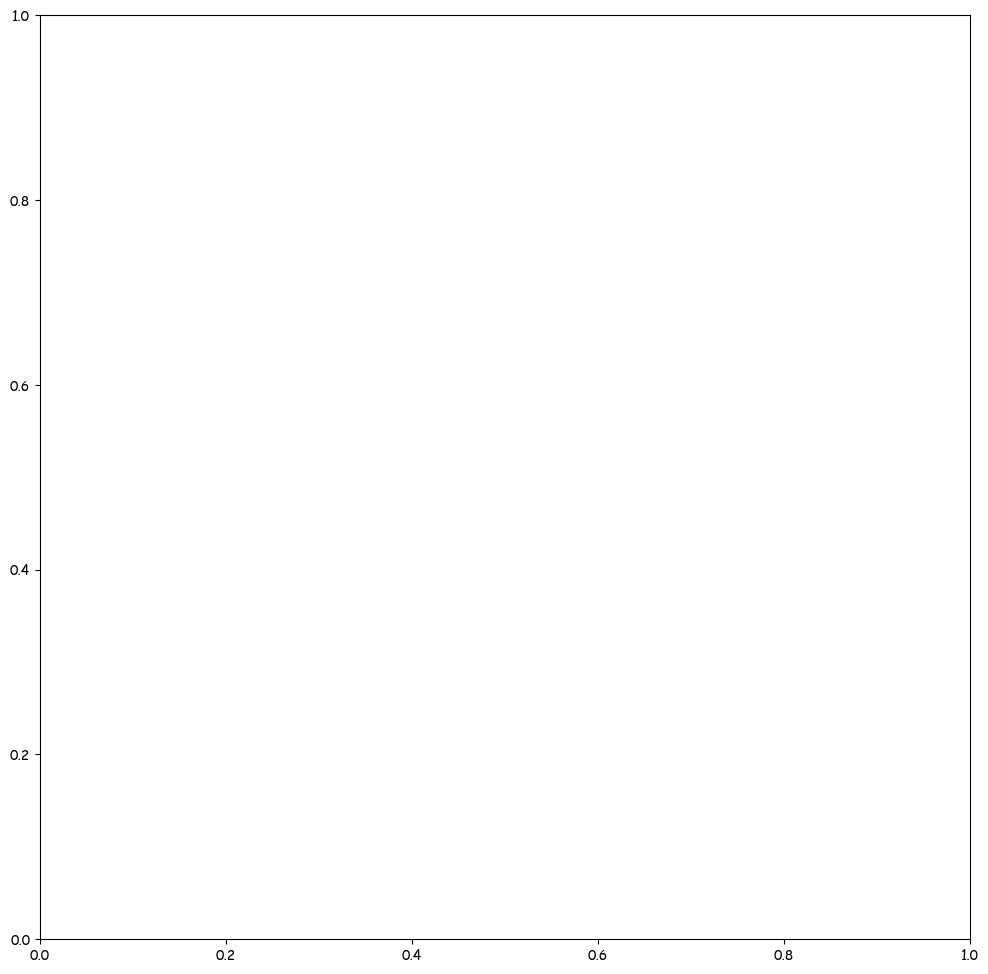

In [8]:
import matplotlib.font_manager as fm

# Example: Use a custom font (must be installed on your system)
plt.rcParams['font.family'] = 'Comic Sans MS'  # Replace with your font



# Aggregate by state
df_selena_by_state = df_selena.groupby('State')['Births'].sum().reset_index()
df_sorted = df_selena_by_state.sort_values(by='Births', ascending=False).reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#fff533')  # Yellow background
ax.set_facecolor('#fff533')
bars = ax.barh(df_sorted['State'], df_sorted['Births'], color='#ff1493')
for bar, state in zip(bars, df_sorted['State']):
    if state == 'TX':
        bar.set_color('#ff0000')

# Add text + handle
ax.set_title("Popularity of 'Selena' by State", fontsize=24, weight='bold', color='black', pad=20)
ax.text(0.5, -5, "EL BIDI BIDI BOM BOM", ha='center', fontsize=22, weight='bold', color='black',
        transform=ax.transAxes)
ax.text(0.98, 0.02, "@hi.voltage.visuals", ha='right', va='bottom', fontsize=12, color='black',
        transform=ax.transAxes)

# Style
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5, color='black')
plt.xlabel("Total Births", fontsize=14, color='black')
plt.ylabel("State", fontsize=14, color='black')
plt.tight_layout()
plt.savefig("selena_static_chart.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(12, 12))  # Bigger square
# Keep the rest of your code the same


In [9]:
# Group Selena births by year across all states
df_selena_yearly = df_selena.groupby('Year')['Births'].sum().reset_index()


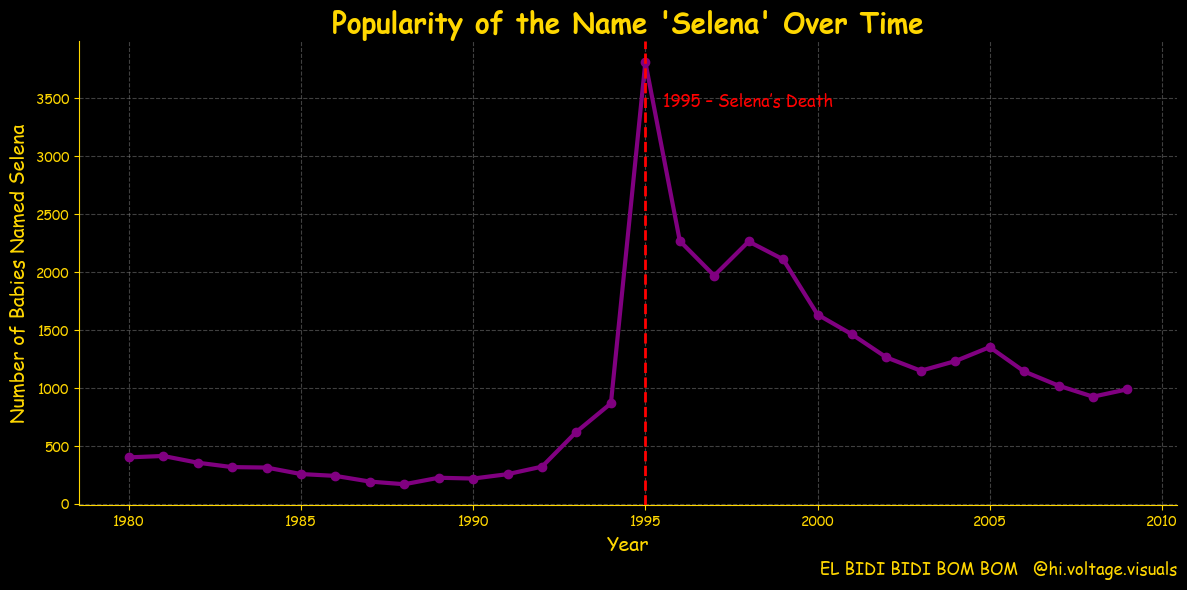

In [10]:
import matplotlib.pyplot as plt

# Set colors
bg_color = '#000000'      # Black background
line_color = '#800080'    # Purple line
highlight_color = '#FF0000'  # Red highlight for 1995
text_color = '#FFD700'    # Gold text

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot the line
ax.plot(df_selena_yearly['Year'], df_selena_yearly['Births'], marker='o', color=line_color, linewidth=3)

# Highlight 1995 (Selena Quintanilla’s death)
ax.axvline(1995, color=highlight_color, linestyle='--', linewidth=2)
ax.text(1995 + 0.5, df_selena_yearly['Births'].max()*0.9, "1995 – Selena’s Death", color=highlight_color, fontsize=12)

# Titles and labels
ax.set_title("Popularity of the Name 'Selena' Over Time", fontsize=20, weight='bold', color=text_color)
ax.set_xlabel("Year", fontsize=14, color=text_color)
ax.set_ylabel("Number of Babies Named Selena", fontsize=14, color=text_color)

# Style axes
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(text_color)
ax.spines['bottom'].set_color(text_color)
ax.grid(color='gray', linestyle='--', alpha=0.5)

# Add footer/handle
ax.text(1.0, -0.15, "EL BIDI BIDI BOM BOM   @hi.voltage.visuals", transform=ax.transAxes,
        ha='right', fontsize=12, color=text_color)

plt.tight_layout()
plt.savefig("selena_name_trend_line.png", dpi=300)
plt.show()


In [11]:
# Filter for Selena in Texas
df_tx_selena = df_selena[df_selena['State'] == 'TX']

# Group by year
df_tx_selena_yearly = df_tx_selena.groupby('Year')['Births'].sum().reset_index()


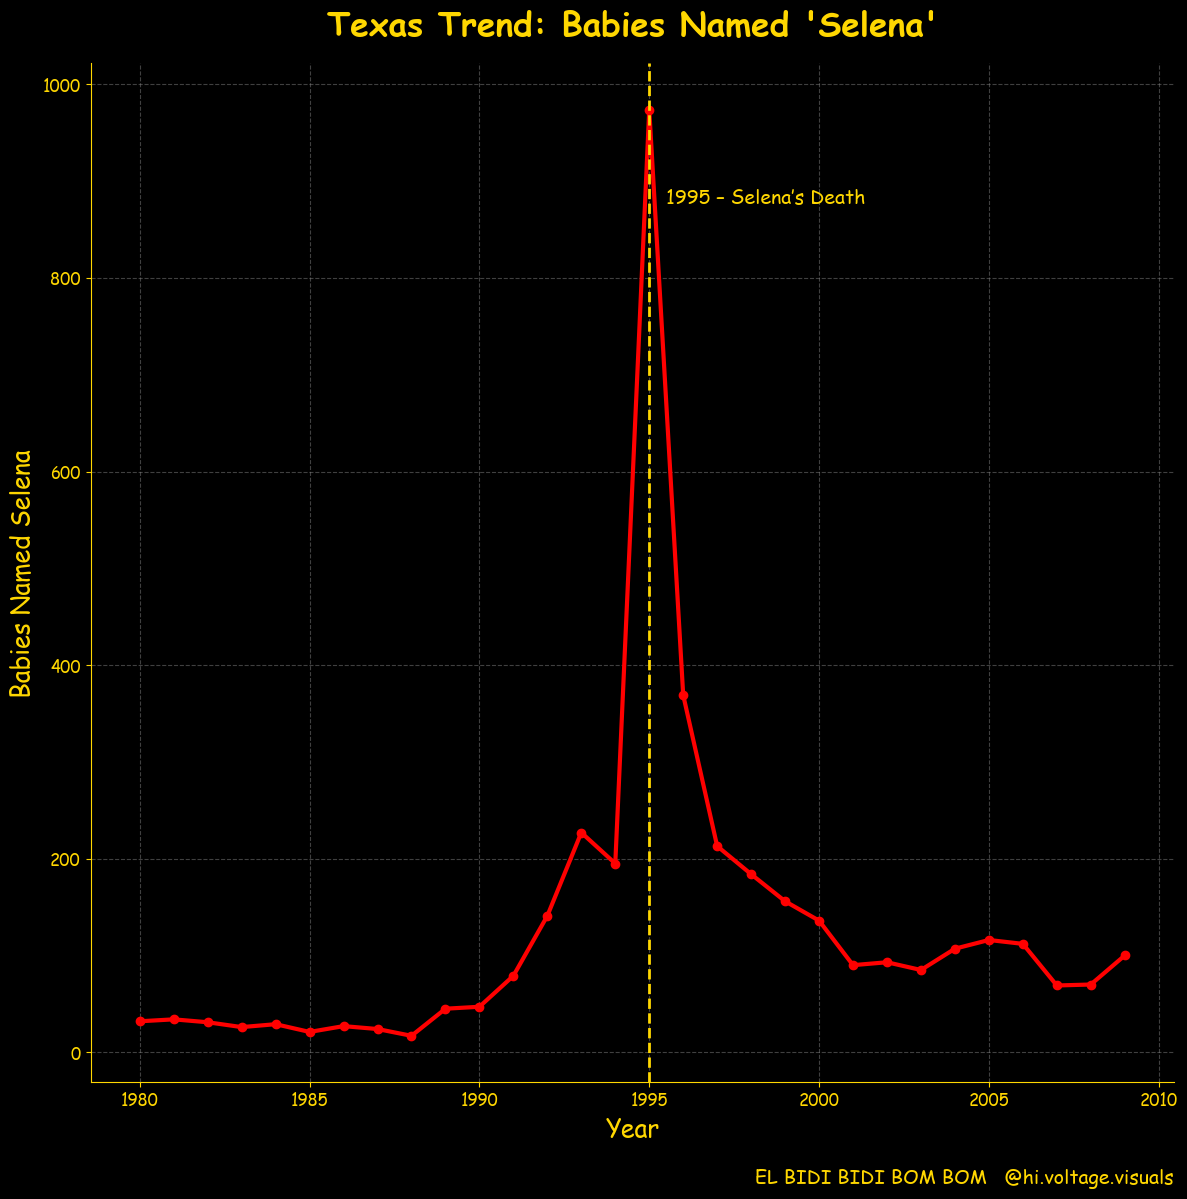

In [12]:
# Plot for Texas only
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('#000000')
ax.set_facecolor('#000000')

# Plot Texas trend
ax.plot(df_tx_selena_yearly['Year'], df_tx_selena_yearly['Births'], marker='o', color='#FF0000', linewidth=3)

# Highlight 1995
ax.axvline(1995, color='#FFD700', linestyle='--', linewidth=2)
ax.text(1995 + 0.5, df_tx_selena_yearly['Births'].max()*0.9, "1995 – Selena’s Death", color='#FFD700', fontsize=14)

# Titles and labels
ax.set_title("Texas Trend: Babies Named 'Selena'", fontsize=24, weight='bold', color='#FFD700', pad=20)
ax.set_xlabel("Year", fontsize=18, color='#FFD700')
ax.set_ylabel("Babies Named Selena", fontsize=18, color='#FFD700')

# Style
ax.tick_params(axis='x', colors='#FFD700', labelsize=12)
ax.tick_params(axis='y', colors='#FFD700', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FFD700')
ax.spines['bottom'].set_color('#FFD700')
ax.grid(color='gray', linestyle='--', alpha=0.5)

# Footer
ax.text(1.0, -0.1, "EL BIDI BIDI BOM BOM   @hi.voltage.visuals", transform=ax.transAxes,
        ha='right', fontsize=14, color='#FFD700')

plt.tight_layout()
plt.savefig("selena_tx_trend.png", dpi=300)
plt.show()


In [13]:
# Filter for Texas and California
df_tx_ca = df_selena[df_selena['State'].isin(['TX', 'CA'])]

# Group by Year and State
df_tx_ca_yearly = df_tx_ca.groupby(['Year', 'State'])['Births'].sum().reset_index()

# Pivot for plotting
df_pivot_tx_ca = df_tx_ca_yearly.pivot(index='Year', columns='State', values='Births').fillna(0)


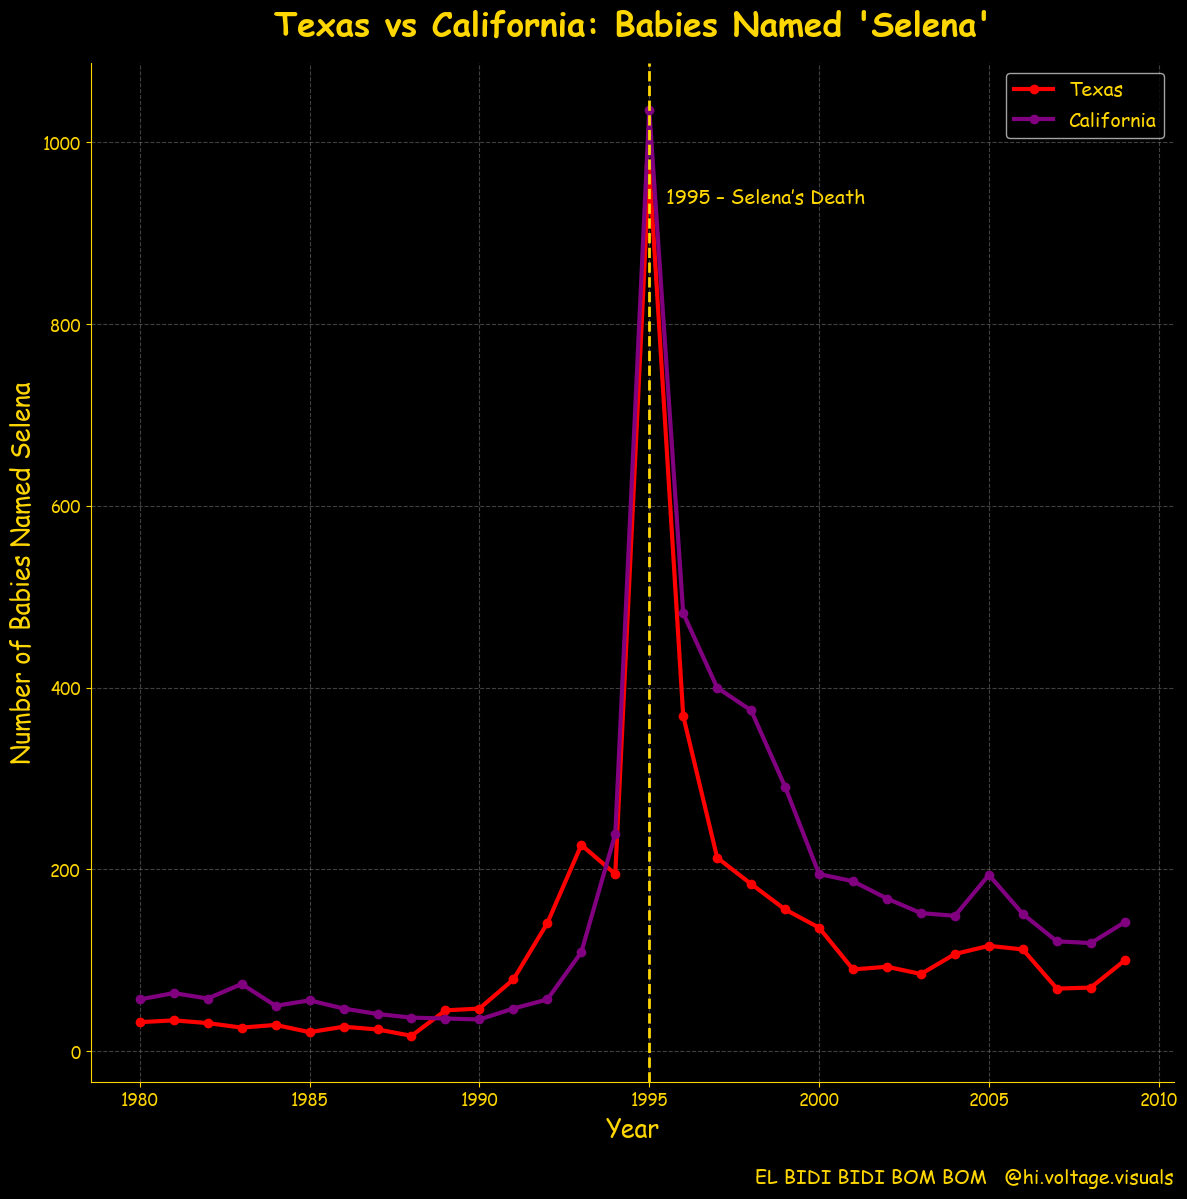

In [14]:
import matplotlib.pyplot as plt

# Colors
bg_color = '#000000'       # Black background
tx_color = '#FF0000'       # Texas in red
ca_color = '#800080'       # California in purple
text_color = '#FFD700'     # Gold text

# Plot setup
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot both states
ax.plot(df_pivot_tx_ca.index, df_pivot_tx_ca['TX'], marker='o', color=tx_color, linewidth=3, label='Texas')
ax.plot(df_pivot_tx_ca.index, df_pivot_tx_ca['CA'], marker='o', color=ca_color, linewidth=3, label='California')

# Highlight 1995
ax.axvline(1995, color=text_color, linestyle='--', linewidth=2)
ax.text(1995 + 0.5, max(df_pivot_tx_ca.max())*0.9, "1995 – Selena’s Death", color=text_color, fontsize=14)

# Titles and labels
ax.set_title("Texas vs California: Babies Named 'Selena'", fontsize=24, weight='bold', color=text_color, pad=20)
ax.set_xlabel("Year", fontsize=18, color=text_color)
ax.set_ylabel("Number of Babies Named Selena", fontsize=18, color=text_color)

# Style axes
ax.tick_params(axis='x', colors=text_color, labelsize=12)
ax.tick_params(axis='y', colors=text_color, labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(text_color)
ax.spines['bottom'].set_color(text_color)
ax.grid(color='gray', linestyle='--', alpha=0.5)

# Legend and footer
ax.legend(facecolor=bg_color, labelcolor=text_color, fontsize=14)
ax.text(1.0, -0.1, "EL BIDI BIDI BOM BOM   @hi.voltage.visuals", transform=ax.transAxes,
        ha='right', fontsize=14, color=text_color)

plt.tight_layout()
plt.savefig("selena_tx_ca_trend.png", dpi=300)
plt.show()


In [15]:
plt.savefig("selena_tx_ca_trend.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [16]:
# Print Texas data
print("📍 Texas - Babies Named Selena by Year")
print(df_pivot_tx_ca['TX'])

# Print California data
print("\n📍 California - Babies Named Selena by Year")
print(df_pivot_tx_ca['CA'])


📍 Texas - Babies Named Selena by Year
Year
1980     32
1981     34
1982     31
1983     26
1984     29
1985     21
1986     27
1987     24
1988     17
1989     45
1990     47
1991     79
1992    141
1993    227
1994    195
1995    974
1996    369
1997    213
1998    184
1999    156
2000    136
2001     90
2002     93
2003     85
2004    107
2005    116
2006    112
2007     69
2008     70
2009    100
Name: TX, dtype: int64

📍 California - Babies Named Selena by Year
Year
1980      57
1981      64
1982      58
1983      74
1984      50
1985      56
1986      47
1987      41
1988      37
1989      36
1990      35
1991      47
1992      57
1993     109
1994     239
1995    1036
1996     482
1997     400
1998     375
1999     291
2000     195
2001     187
2002     168
2003     152
2004     149
2005     194
2006     151
2007     121
2008     119
2009     142
Name: CA, dtype: int64


In [17]:
# Aggregate all Selena births by state (total across years)
df_selena_by_state = df_selena.groupby('State')['Births'].sum().reset_index()
df_selena_by_state_sorted = df_selena_by_state.sort_values(by='Births', ascending=False)

print("\n📊 Top States for 'Selena' (All Years)")
print(df_selena_by_state_sorted)



📊 Top States for 'Selena' (All Years)
   State  Births
4     CA    5169
43    TX    3849
34    NY    1765
9     FL    1611
14    IL    1354
38    PA    1046
22    MI     970
35    OH     955
3     AZ     940
10    GA     854
27    NC     814
46    WA     667
31    NJ     583
15    IN     577
42    TN     570
45    VA     534
5     CO     529
1     AL     460
47    WI     452
19    MA     443
17    KY     425
32    NM     410
23    MN     386
24    MO     370
20    MD     370
37    OR     360
18    LA     343
40    SC     338
36    OK     296
25    MS     265
6     CT     236
12    IA     232
16    KS     229
33    NV     229
2     AR     205
44    UT     163
29    NE     118
11    HI     109
48    WV      93
39    RI      81
13    ID      75
8     DE      61
7     DC      34
0     AK      31
30    NH      28
26    MT      28
41    SD      19
21    ME      17
49    WY      11
28    ND       5


In [23]:
# Filter for Texas and California only
df_tx_ca = df_selena[df_selena['State'].isin(['TX', 'CA'])]

# Group by Year and State
df_tx_ca_yearly = df_tx_ca.groupby(['Year', 'State'])['Births'].sum().reset_index()

# Pivot for bar chart
df_bar = df_tx_ca_yearly.pivot(index='Year', columns='State', values='Births').fillna(0)


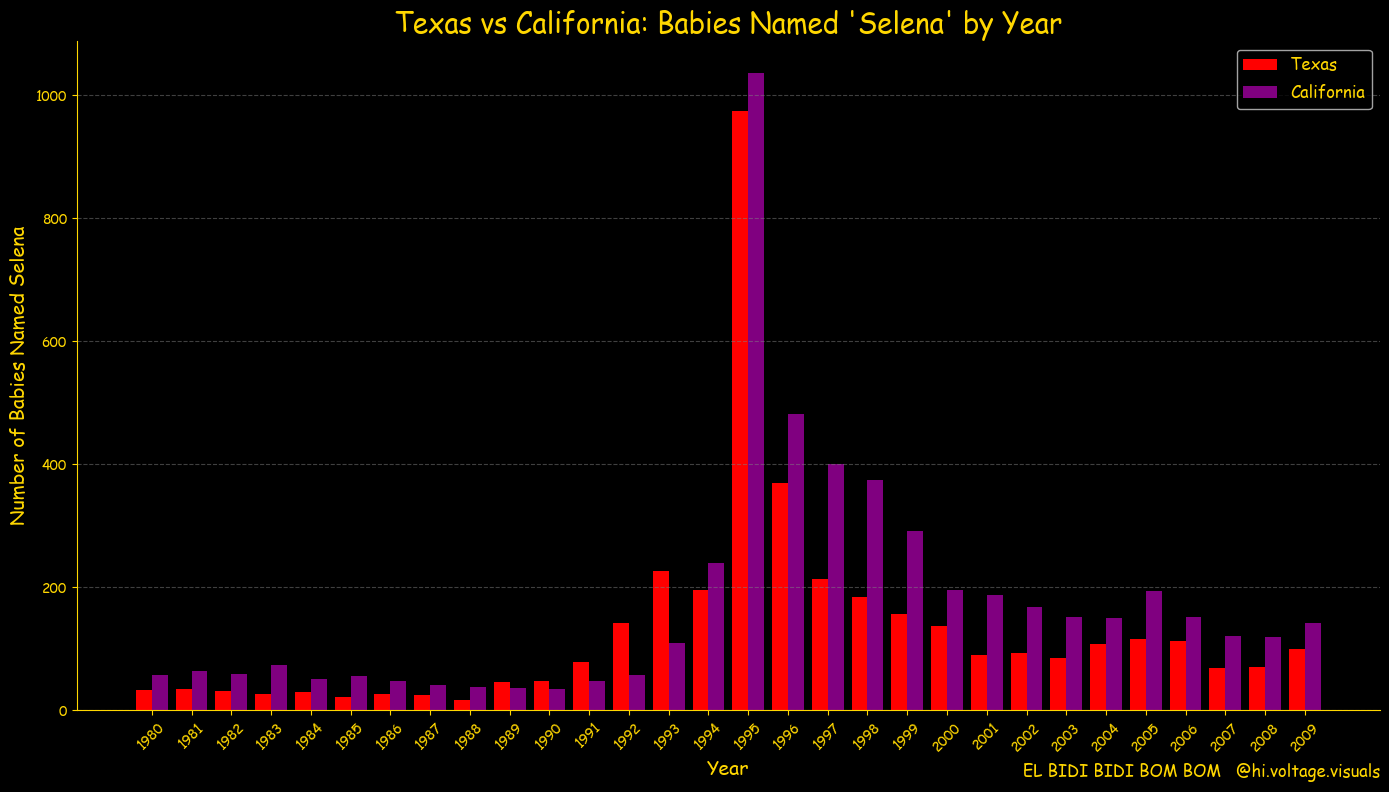

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set bar positions
years = df_bar.index.tolist()
bar_width = 0.4
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Plot bars
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#000000')
ax.set_facecolor('#000000')

# Bars
ax.bar(r1, df_bar['TX'], color='#FF0000', width=bar_width, label='Texas')        # Red
ax.bar(r2, df_bar['CA'], color='#800080', width=bar_width, label='California')  # Purple

# X-axis labels
ax.set_xticks([r + bar_width/2 for r in range(len(years))])
ax.set_xticklabels(years, rotation=45, color='gold')

# Labels and title
ax.set_title("Texas vs California: Babies Named 'Selena' by Year", fontsize=20, color='gold')
ax.set_xlabel("Year", fontsize=14, color='gold')
ax.set_ylabel("Number of Babies Named Selena", fontsize=14, color='gold')

# Style
ax.tick_params(colors='gold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gold')
ax.spines['bottom'].set_color('gold')
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)

# Legend and footer
ax.legend(facecolor='#000000', labelcolor='gold', fontsize=12)
ax.text(1.0, -0.1, "EL BIDI BIDI BOM BOM   @hi.voltage.visuals", transform=ax.transAxes,
        ha='right', fontsize=12, color='gold')

plt.tight_layout()
plt.savefig("selena_tx_ca_bar_chart.png", dpi=300)
plt.show()


In [18]:
# Aggregate Selena name count by state
df_selena_by_state = df_selena.groupby('State')['Births'].sum().reset_index()


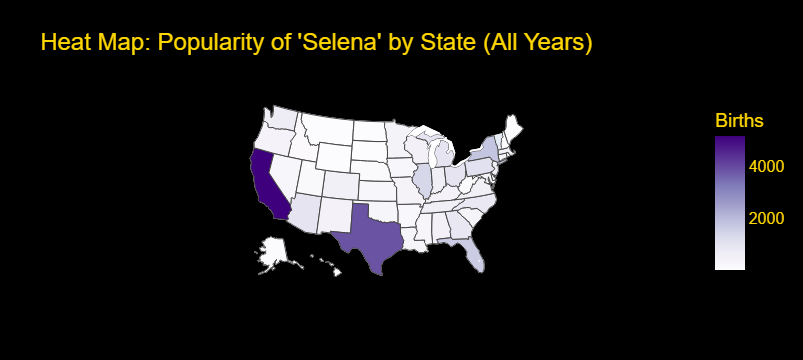

In [19]:
import plotly.express as px

# Create heat map
fig = px.choropleth(
    df_selena_by_state,
    locations='State',
    locationmode='USA-states',
    color='Births',
    scope='usa',
    color_continuous_scale='purples',  # You can change this to 'reds' or 'magma'
    title="Heat Map: Popularity of 'Selena' by State (All Years)"
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    paper_bgcolor='#000000',
    plot_bgcolor='#000000',
    font=dict(family='Arial', size=16, color='gold'),
    title_font=dict(size=24, color='gold')
)

fig.show()


In [20]:
# Save as interactive HTML
fig.write_html("selena_heatmap.html")


In [21]:
# Save static image
fig.write_image("selena_heatmap.png", width=1080, height=720, scale=2)


In [22]:
fig.write_image("selena_heatmap_square.png", width=1080, height=1080, scale=2)


In [25]:
# Group by Name and Gender, sum all births
df_top_names = df_names.groupby(['Name', 'Gender'])['Births'].sum().reset_index()

# Sort by total births descending
df_top_names_sorted = df_top_names.sort_values(by='Births', ascending=False)

# Preview top results
print(df_top_names_sorted.head(10))


              Name Gender   Births
16160      Michael      M  1376418
4594   Christopher      M  1118253
15743      Matthew      M  1031984
11235       Joshua      M   957518
10758      Jessica      F   863121
5346        Daniel      M   821281
5584         David      M   816976
2295        Ashley      F   786945
9796         James      M   764296
1513        Andrew      M   760250


In [26]:
# Most popular girl name
top_girl = df_top_names_sorted[df_top_names_sorted['Gender'] == 'F'].iloc[0]

# Most popular boy name
top_boy = df_top_names_sorted[df_top_names_sorted['Gender'] == 'M'].iloc[0]

print(f"👧 Most Popular Girl Name: {top_girl['Name']} ({top_girl['Births']} births)")
print(f"👦 Most Popular Boy Name: {top_boy['Name']} ({top_boy['Births']} births)")


👧 Most Popular Girl Name: Jessica (863121 births)
👦 Most Popular Boy Name: Michael (1376418 births)


In [27]:
# Group by Name and Gender
df_top_names = df_names.groupby(['Name', 'Gender'])['Births'].sum().reset_index()

# Sort descending
df_top_names_sorted = df_top_names.sort_values(by='Births', ascending=False)

# Get top girl and boy names
top_girl_name = df_top_names_sorted[df_top_names_sorted['Gender'] == 'F'].iloc[0]['Name']
top_boy_name = df_top_names_sorted[df_top_names_sorted['Gender'] == 'M'].iloc[0]['Name']

print(f"👧 Most Popular Girl Name: {top_girl_name}")
print(f"👦 Most Popular Boy Name: {top_boy_name}")


👧 Most Popular Girl Name: Jessica
👦 Most Popular Boy Name: Michael


In [28]:
# Girl name by state
df_top_girl_state = df_names[(df_names['Name'] == top_girl_name) & (df_names['Gender'] == 'F')] \
    .groupby('State')['Births'].sum().reset_index()

# Boy name by state
df_top_boy_state = df_names[(df_names['Name'] == top_boy_name) & (df_names['Gender'] == 'M')] \
    .groupby('State')['Births'].sum().reset_index()


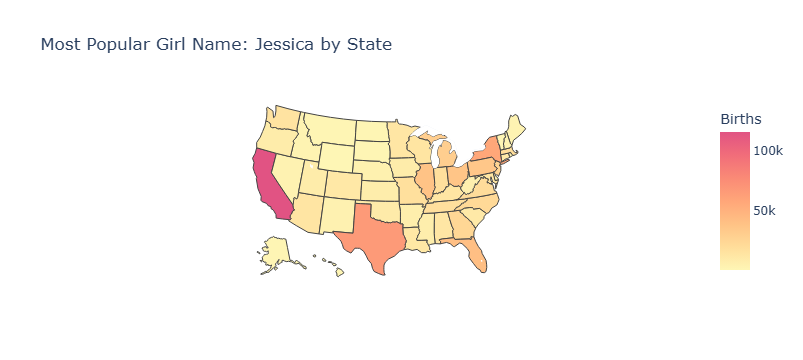

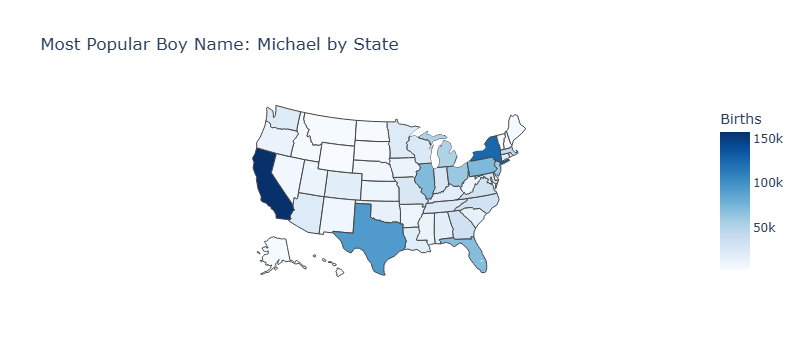

In [29]:
import plotly.express as px

# Heat map for girl name
fig_girl = px.choropleth(df_top_girl_state,
    locations='State', locationmode='USA-states', color='Births',
    scope='usa', color_continuous_scale='pinkyl',
    title=f"Most Popular Girl Name: {top_girl_name} by State")

fig_girl.show()

# Heat map for boy name
fig_boy = px.choropleth(df_top_boy_state,
    locations='State', locationmode='USA-states', color='Births',
    scope='usa', color_continuous_scale='blues',
    title=f"Most Popular Boy Name: {top_boy_name} by State")

fig_boy.show()


In [30]:
# Save girl name heat map
fig_girl.write_html("most_popular_girl_name_by_state.html")

# Save boy name heat map
fig_boy.write_html("most_popular_boy_name_by_state.html")
